In [41]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random

In [42]:
dataPath = 'C:/Users/win/Downloads/PBL4_Test/01-DataSet/images'

In [43]:

def loadDataSet(dataPath):
    data = []
    imageSize = 28
    for cat in os.listdir(dataPath):
        label = int(cat[:2])
        for i in os.listdir(dataPath+'/'+cat):
            imagePath = dataPath+'/'+cat+'/'+i
            try:
                image = cv2.imread(imagePath,0) 
                image = cv2.resize(image,(imageSize,imageSize))
                data.append([image,label])
            except:
                pass
    
    random.shuffle(data)
    
    X = [] #image
    Y = [] #labels
    for img,l in data: 
        X.append(img)
        Y.append(l)
    X = np.array(X)
    Y = np.array(Y).reshape(len(Y),1)
    return X,Y

In [44]:
#Load Data Set 
images,labels=loadDataSet(dataPath)

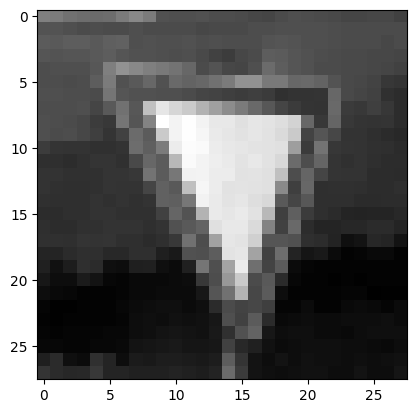

[3]


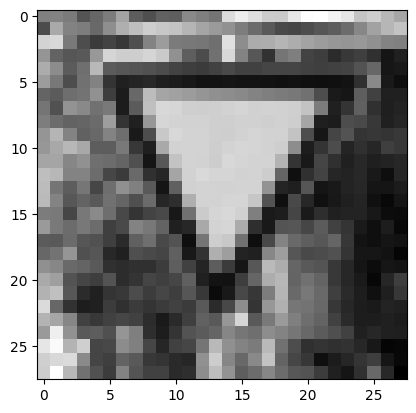

[3]


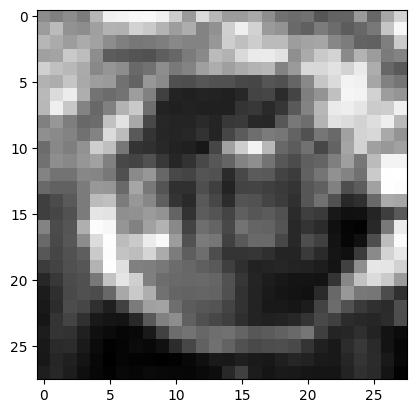

[0]


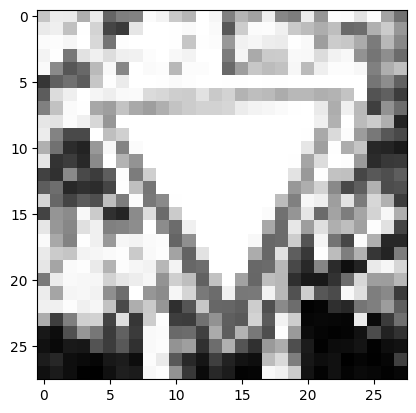

[3]


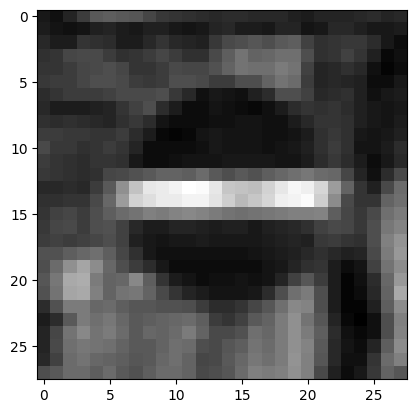

[1]


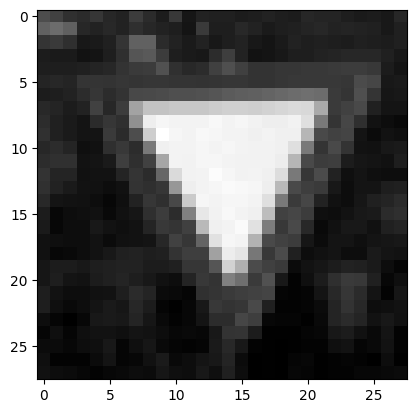

[3]


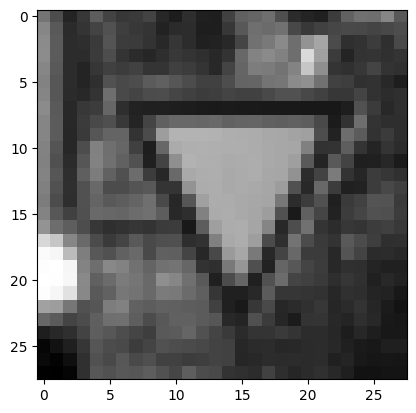

[3]


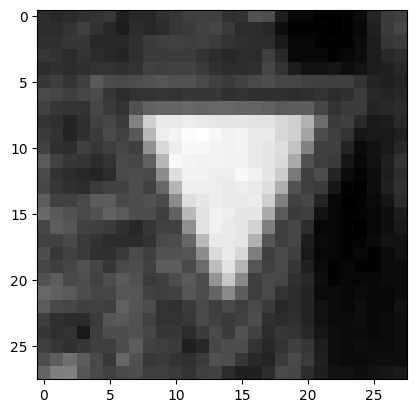

[3]


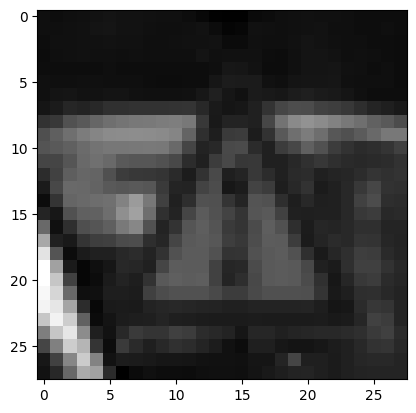

[2]


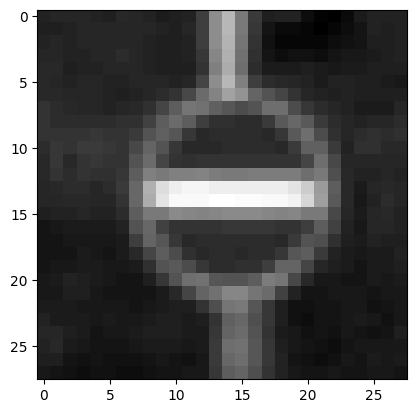

[1]


In [45]:
#plot some examples from our images
for i in range(10):
    plt.imshow(images[i],cmap='gray')
    plt.show()
    print(labels[i])

In [46]:
#Compute the mean and Standard Deviation , becouse we need it Later in Normalize the images 
mu=np.mean(images)
std=np.std(images)
print("The Mean=",mu)
print("The Standard Deviation=",std)

The Mean= 92.09727905792265
The Standard Deviation= 71.1439712262546


In [47]:
images.shape

(4648, 28, 28)

In [48]:
m=images.shape[0] # 3D Array (number of training images,)
imageShape=images.shape[1:]

In [49]:
#Splitting Data into Training Set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=0)
print("the Number of Training Example=",x_train.shape[0])
print("the Number of Testing Example=",x_test.shape[0])

the Number of Training Example= 3718
the Number of Testing Example= 930


In [50]:
x_trainNorm = (x_train - mu)/std
x_testNorm  = (x_test - mu)/std
x_trainNorm = x_trainNorm.reshape(3718, 28, 28,1)
x_testNorm = x_testNorm.reshape(930, 28, 28,1)

In [51]:
def preprocessingImage(image=None,imageSize=28,mu=92.09727905792265,std=71.1439712262546):
    try:
        image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    except:
        pass
    image = cv2.resize(image,(imageSize,imageSize))
    image = (image - mu) / std
    image = image.reshape(1,imageSize,imageSize,1)
    return image

In [52]:
import tensorflow as tf
from tensorflow import keras

In [53]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.99):
            self.model.stop_training=True
            
model = keras.Sequential([
    keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(4,4)),
    keras.layers.Flatten(),
    keras.layers.Dense(4,tf.nn.softmax)
])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 8)          0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1156      
                                                                 
Total params: 1,236
Trainable params: 1,236
Non-trainable params: 0
_________________________________________________________________


In [54]:
#Fightting 
model.fit(x_trainNorm,
          y_train,
          epochs = 50,
          callbacks = [myCallBack()])

Epoch 1/50
117/117 [==============================] - 1s 5ms/step - loss: 0.9792 - accuracy: 0.6213
Epoch 2/50
117/117 [==============================] - 1s 5ms/step - loss: 0.4677 - accuracy: 0.8878
Epoch 3/50
117/117 [==============================] - 1s 5ms/step - loss: 0.2691 - accuracy: 0.9427
Epoch 4/50
117/117 [==============================] - 1s 5ms/step - loss: 0.1818 - accuracy: 0.9599
Epoch 5/50
117/117 [==============================] - 1s 5ms/step - loss: 0.1361 - accuracy: 0.9726
Epoch 6/50
117/117 [==============================] - 1s 5ms/step - loss: 0.1083 - accuracy: 0.9798
Epoch 7/50
117/117 [==============================] - 1s 5ms/step - loss: 0.0908 - accuracy: 0.9836
Epoch 8/50
117/117 [==============================] - 1s 5ms/step - loss: 0.0769 - accuracy: 0.9866
Epoch 9/50
117/117 [==============================] - 1s 5ms/step - loss: 0.0650 - accuracy: 0.9898
Epoch 10/50
117/117 [==============================] - 1s 5ms/step - loss: 0.0560 - accuracy: 0.9925

In [55]:
model.evaluate(x_testNorm,
               y_test,
               verbose = 0)

[0.06029327213764191, 0.9935483932495117]

In [56]:
model.save('Models/TSModel')

INFO:tensorflow:Assets written to: Models/TSModel\assets


INFO:tensorflow:Assets written to: Models/TSModel\assets


In [57]:
model=keras.models.load_model('Models/TSModel')

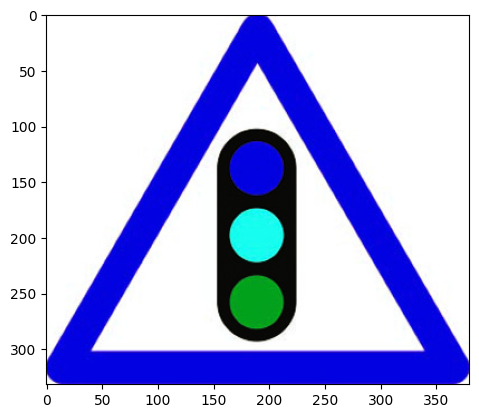

1/1 [==============================] - 0s 58ms/step
Stop = 1.0258802e-05%
Do not Enter = 4.2964157e-12%
Traffic Jam = 99.999985%
Yeild = 1.2722954e-11%


In [58]:
imgPath="C:/Users/win/Downloads/PBL4_Test/03-Training/UnseenImages/02/3.jpg"
image = cv2.imread(imgPath,1)
plt.imshow(image)
plt.show()
img=preprocessingImage(image)
pred=model.predict(img)*100 # 4*1

print("Stop = "+str(pred[0][0])+"%")
print("Do not Enter = " + str(pred[0][1])+"%")
print("Traffic Jam = "+str(pred[0][2])+"%")
print("Yeild = "+str(pred[0][3])+"%")
#print("AheadOnly = "+str(pred[0][4])+"%")

In [59]:
from tensorflow import keras

In [60]:
modelPath = 'C:/Users/win/Downloads/PBL4_Test/03-Training/Models'
model = keras.models.load_model(modelPath+'/TSModel')